In [168]:
# http://matplotlib.org/examples/api/barchart_demo.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [206]:
import pandas as pd

df_lexrank= pd.DataFrame(mat_lexrank)
df_lexrank.to_csv('lexrank_results.csv')

df_concept= pd.DataFrame(mat_concept)
df_concept.to_csv('concept_results.csv')

df_CSTSumm= pd.DataFrame(mat_CSTSumm)
df_CSTSumm.to_csv('CSTSumm_results.csv')

lexrank_mean=df_lexrank.mean().to_dict()
concept_mean=df_concept.mean().to_dict()
CSTSumm_mean=df_CSTSumm.mean().to_dict()

# http://matplotlib.org/examples/api/barchart_demo.html
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ast

mat_lexrank = []
mat_CSTSumm = []
mat_concept = []

def bar_plot(lexrank, cstsumm, concept):
    N = 15
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lexrank.values(), width, color='r')
    rects2 = ax.bar(ind + width, cstsumm.values(), width, color='g')
    rects3 = ax.bar(ind + width + width, concept.values(), width, color='b')
    # add some text for labels, title and axes ticks
    ax.set_ylabel('Rouge mesure')
    ax.set_title('Experiment')
    ax.set_xticks(ind + width)
    label = ax.set_xticklabels(concept.keys())
    plt.setp(label, rotation=90)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    ax.legend((rects1[0],rects2[0], rects3[0]), ('LexRank', 'CSTSumm', 'Concept'), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

import os, fnmatch

rootdir = 'output'
text=[]
for subdirs, dirs, files in os.walk(rootdir):
  for dir in dirs:
    for file in os.listdir(os.path.join(subdirs, dir)):
      if fnmatch.fnmatch(file, '*original.txt'):
        print(os.path.join(dir))
        tex_={}
        with open(os.path.join(subdirs, dir, 'original.txt'), 'r') as flxk:
          tex_['text']=(flxk.read())
        tex_['text_len']=len(tex_['text'].split())
        tex_['type-token']= float(len(np.unique(np.array(tex_['text'].split()))))/float(len(tex_['text'].split()))
        text.append(tex_)
        with open(os.path.join(subdirs, dir, 'rouge_lexrank.txt'), 'r') as flxk:
          lexrank = ast.literal_eval(flxk.read())
          mat_lexrank.append(lexrank)
        with open(os.path.join(subdirs, dir, 'rouge_CSTSUmm.txt'), 'r') as fcst:
          cstsumm = ast.literal_eval(fcst.read())
          mat_CSTSumm.append(cstsumm)
        with open(os.path.join(subdirs, dir, 'rouge_concept.txt'), 'r') as fconp:
          concept = ast.literal_eval(fconp.read())
          mat_concept.append(concept)
        #bar_plot(lexrank, cstsumm, concept)

        
df_lexrank = pd.DataFrame(mat_lexrank)
df_concept = pd.DataFrame(mat_concept)
df_CSTSumm = pd.DataFrame(mat_CSTSumm)
        
df_lexrank = pd.concat([df_text_leg,df_lexrank], axis=1)
df_concept = pd.concat([df_text_leg,df_concept], axis=1)
df_CSTSumm = pd.concat([df_text_leg,df_CSTSumm], axis=1)

C10_Mundo_BombardeioLibano
C11_Cotidiano_PCC
C12_Mundo_EnchenteCoreia
C13_Mundo_SriLanka
C14_Mundo_AcidenteTrens
C15_Mundo_ExplosaoMoscou
C16_Politica_Sanguessugas
C17_Politica_EleicaoAlckmim
C18_Mundo_AtaqueVirginia - concordanciaRST
C19_Esportes_Maradona - concordanciaCST
C1_Mundo_AviaoCongo
C20_Politica_CPMF
C21_Cotidiano_ReformaCumbica
C22_Cotidiano_DeslizamentoCongonhas
C23_Mundo_EnchenteReinoUnido - concordanciaCST
C24_Esportes_FabianaMue
C25_Esportes_CopaAmerica
C26_Mundo_FuracaoMexico
C27_Esportes_GoleadaEquador
C28_Esportes_HeptaVolei
C29_Mundo_IndenizacaoIgreja
C2_Politica_ReeleicaoLula
C30_Dinheiro_LucroItau - concordanciaRST
C31_Esportes_Jade - concordanciaCST
C32_Mundo_FalhaNuclear
C33_Cotidiano_LulaBio
C34_Cotidiano_MalhaFina
C35_Mundo_Megatraficante
C36_Cotidiano_MorteACM
C37_Cotidiano_MotimMaranh╞o - concordanciaCST
C38_Esportes_PanNatacao
C39_Cotidiano_PF_Congonhas - concordanciaRST
C3_Cotidiano_AcidenteTAM
C40_Polбtica_ProcuradorRenan
C41_Esportes_RecordeThiago
C42_Po

# n_words

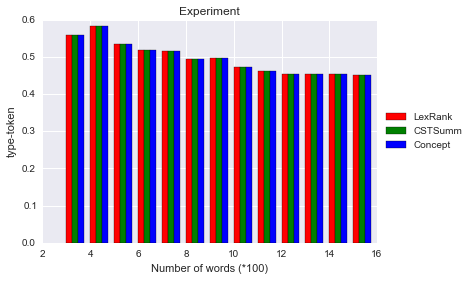

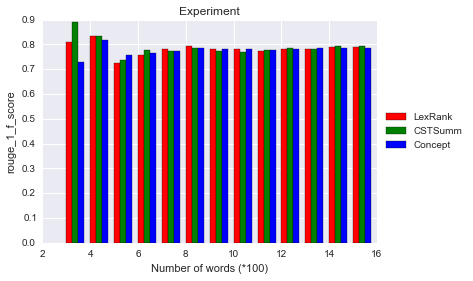

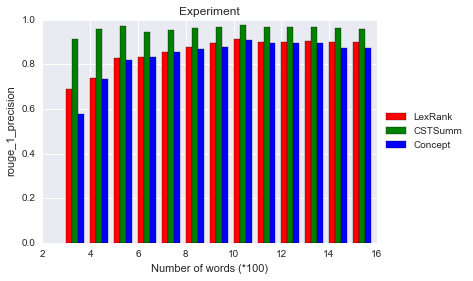

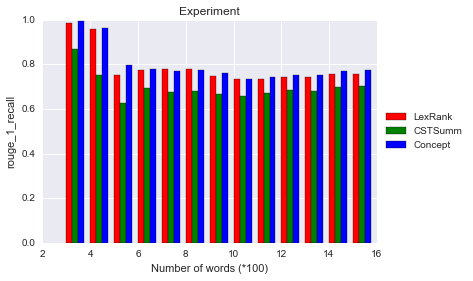

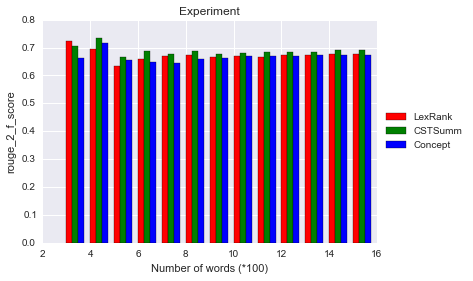

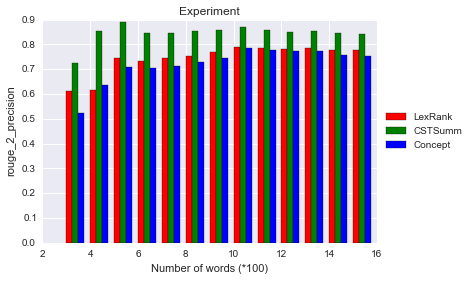

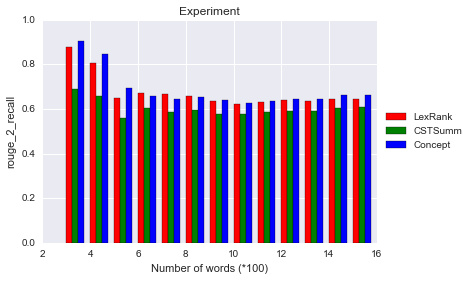

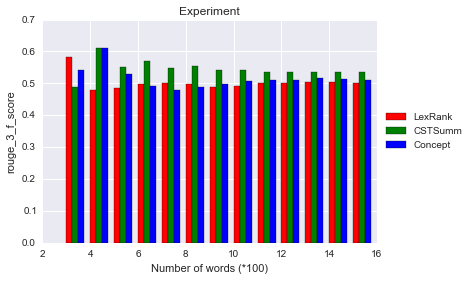

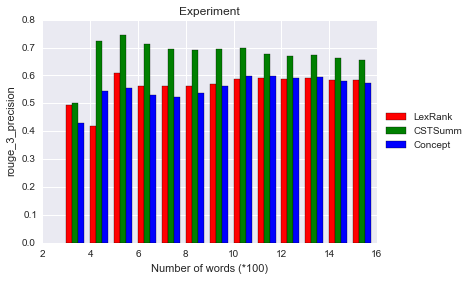

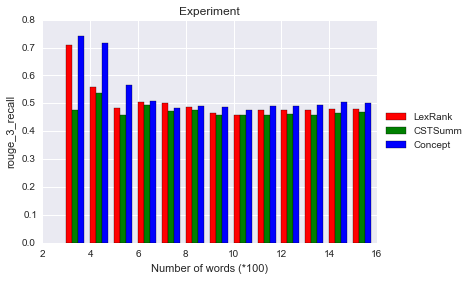

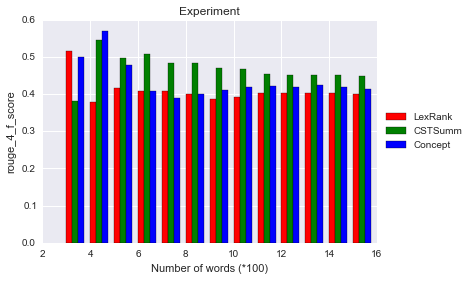

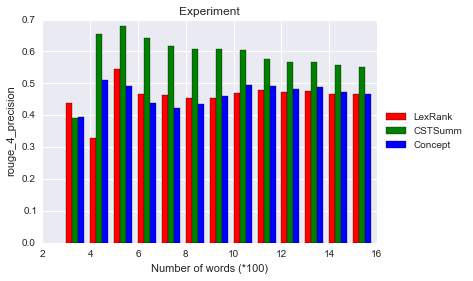

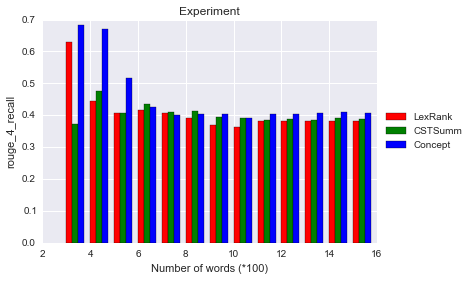

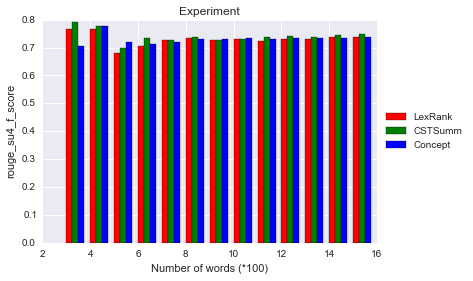

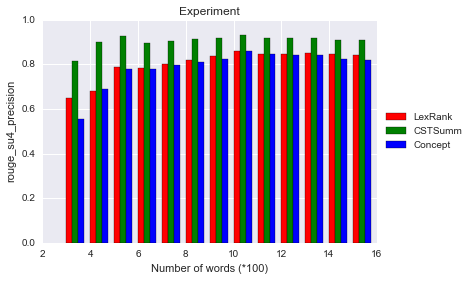

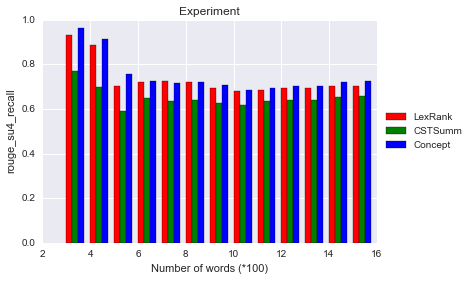

In [218]:

#result.plot(x='text_leng', y='rouge_su4_precision')
#result.head()

step=100
i=0

for c in np.array(df_concept.columns):

    width = 0.25    
    if c not in ["text_len","text"] :

        datax_LexRank=[]
        datay_LexRank=[]
        datax_CSTSumm=[]
        datay_CSTSumm=[]
        datax_Concept=[]
        datay_Concept=[]

    
    
        for i in xrange(16):
            datax_LexRank.append(i)
            datay_LexRank.append(df_lexrank[df_lexrank['text_len']<=i*step][c].mean())
            
            datax_CSTSumm.append(i+width)
            datay_CSTSumm.append(df_CSTSumm[df_CSTSumm['text_len']<=i*step][c].mean())
            
            datax_Concept.append(i+width+width)
            datay_Concept.append(df_concept[df_concept['text_len']<=i*step][c].mean())
            
            
            
        N = 15
        ind = np.arange(N)  # the x locations for the groups
           # the width of the bars
        fig, ax = plt.subplots()
        #print df_lexrank.sort_values('text_leng')[c].values
        rects1 = ax.bar(datax_LexRank, datay_LexRank, width, color='r')
        rects2 = ax.bar(datax_CSTSumm, datay_CSTSumm, width, color='g')
        rects3 = ax.bar(datax_Concept, datay_Concept, width, color='b')
        # add some text for labels, title and axes ticks
        ax.set_ylabel(c)
        ax.set_title('Experiment')
        ax.set_xlabel('Number of words (*100)')
        #label = ax.set_xticklabels(datax)
        #plt.setp(label, rotation=90)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        ax.legend((rects1[0],rects2[0], rects3[0]), ('LexRank', 'CSTSumm', 'Concept'), loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()


# type_token

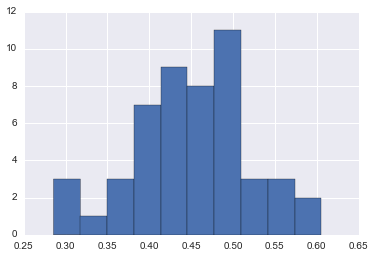

In [201]:
df_text_leg['type-token'].hist()

In [236]:
df_lexrank[df_lexrank['type-token']<=0.5][c].mean()

0.70549292682926834

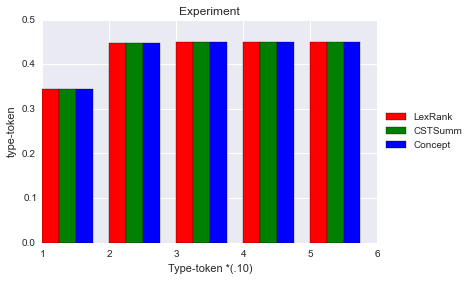

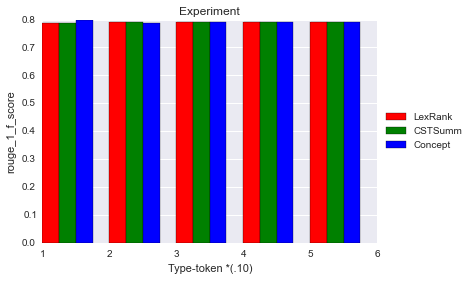

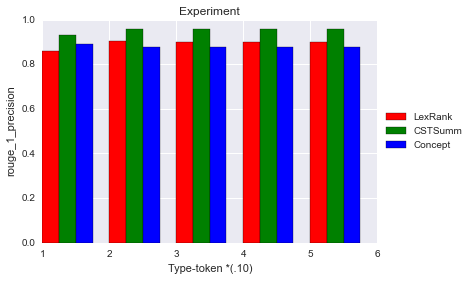

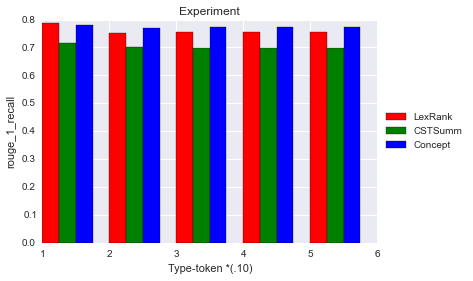

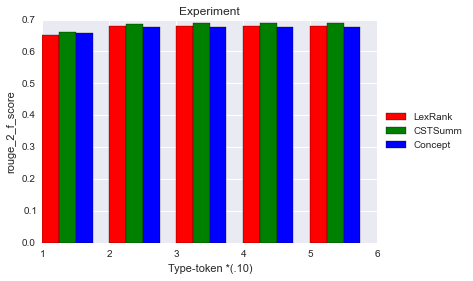

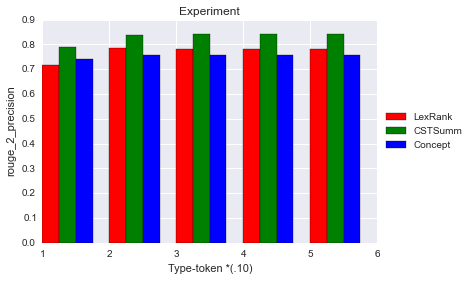

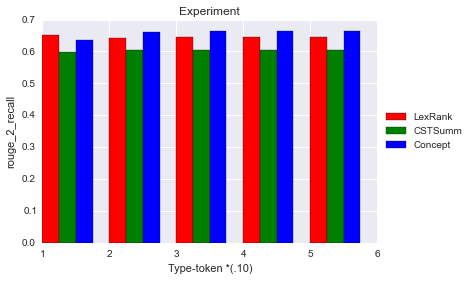

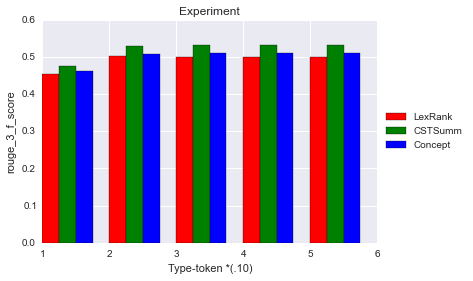

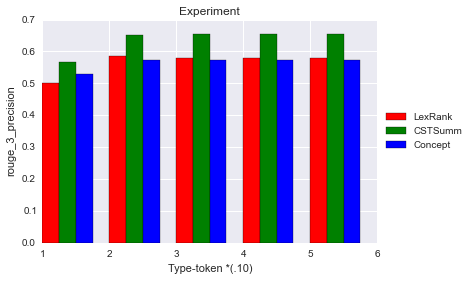

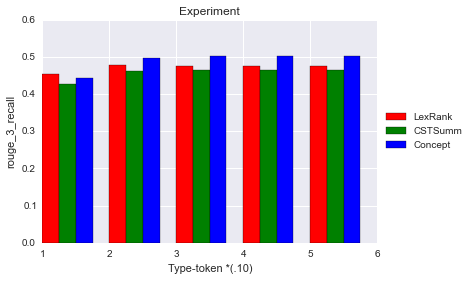

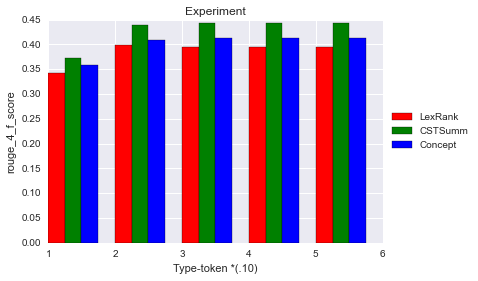

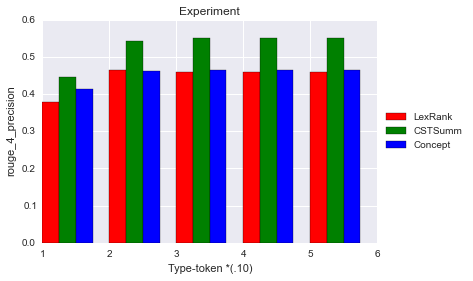

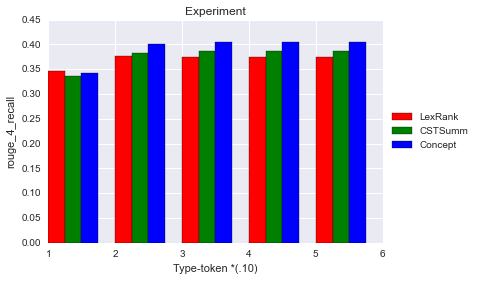

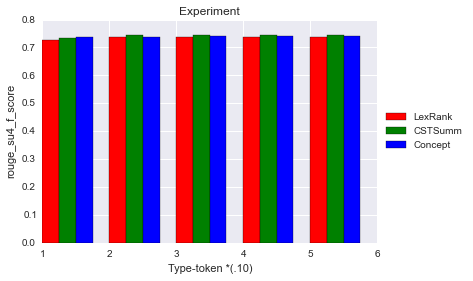

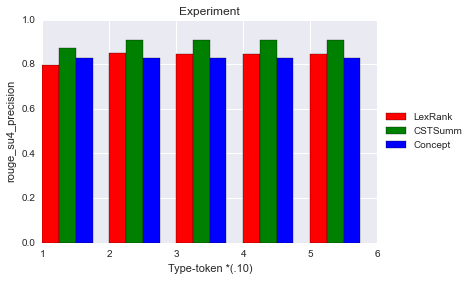

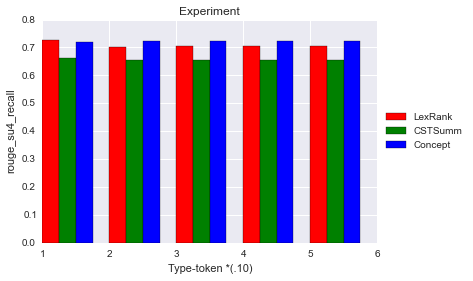

In [241]:

#result.plot(x='text_leng', y='rouge_su4_precision')
#result.head()

step=.20


for c in np.array(df_concept.columns):

    width = 0.25    
    if c not in ["text_len","text"] :

        datax_LexRank=[]
        datay_LexRank=[]
        datax_CSTSumm=[]
        datay_CSTSumm=[]
        datax_Concept=[]
        datay_Concept=[]

    
        x=0
        for i in xrange(6):
            x =x+step
            #print x
            datax_LexRank.append(i)
            datay_LexRank.append(df_lexrank[df_lexrank['type-token']<=x][c].mean())
            
            datax_CSTSumm.append(i+width)
            datay_CSTSumm.append(df_CSTSumm[df_CSTSumm['type-token']<=x][c].mean())
            
            datax_Concept.append(i+width+width)
            datay_Concept.append(df_concept[df_concept['type-token']<=x][c].mean())
            
            
            
        N = 15
        ind = np.arange(N)  # the x locations for the groups
           # the width of the bars
        fig, ax = plt.subplots()
        #print df_lexrank.sort_values('text_leng')[c].values
        rects1 = ax.bar(datax_LexRank, datay_LexRank, width, color='r')
        rects2 = ax.bar(datax_CSTSumm, datay_CSTSumm, width, color='g')
        rects3 = ax.bar(datax_Concept, datay_Concept, width, color='b')
        # add some text for labels, title and axes ticks
        ax.set_ylabel(c)
        ax.set_title('Experiment')
        ax.set_xlabel('Type-token *(.10)')
        #label = ax.set_xticklabels(datax)
        #plt.setp(label, rotation=90)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        ax.legend((rects1[0],rects2[0], rects3[0]), ('LexRank', 'CSTSumm', 'Concept'), loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()


In [317]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


import math

try:
    import numpy
except ImportError:
    numpy = None

from sumy.summarizers._summarizer import AbstractSummarizer
from sumy._compat import Counter


def normalize_word(word):
    return word

def _to_words_set(sentence):
    #words = map(normalize_word, sentence.words)
    words=sentence.split()
    #return [stem_word(w) for w in words if w not in _stop_words]
    return words
    
def _compute_tf(sentences):
    tf_values = map(Counter, sentences)

    tf_metrics = []
    for sentence in tf_values:
        metrics = {}
        max_tf = _find_tf_max(sentence)

        for term, tf in sentence.items():
            metrics[term] = tf / max_tf

        tf_metrics.append(metrics)

    return tf_metrics


def _find_tf_max(terms):
    return max(terms.values()) if terms else 1

def _compute_idf(sentences):
    idf_metrics = {}
    sentences_count = len(sentences)

    for sentence in sentences:
        for term in sentence:
            if term not in idf_metrics:
                n_j = sum(1 for s in sentences if term in s)
                idf_metrics[term] = math.log(sentences_count / (1 + n_j))

    return idf_metrics

def _create_matrix_lex(sentences, threshold, tf_metrics, idf_metrics):
    """
    Creates matrix of shape |sentences|×|sentences|.
    """
    # create matrix |sentences|×|sentences| filled with zeroes
    sentences_count = len(sentences)
    matrix = np.zeros((sentences_count, sentences_count))
    degrees = np.zeros((sentences_count, ))

    for row, (sentence1, tf1) in enumerate(zip(sentences, tf_metrics)):
        for col, (sentence2, tf2) in enumerate(zip(sentences, tf_metrics)):
            matrix[row, col] = compute_distance_lexrank(sentence1, sentence2, tf1, tf2, idf_metrics)

            if matrix[row, col] > threshold:
                matrix[row, col] = 1.0
                degrees[row] += 1
            else:
                matrix[row, col] = 0

    for row in range(sentences_count):
        for col in range(sentences_count):
            if degrees[row] == 0:
                degrees[row] = 1

            matrix[row][col] = matrix[row][col] / degrees[row]

    return matrix

def _create_matrix_aspec(sentences, threshold):
    """
    Creates matrix of shape |sentences|×|sentences|.
    """
    # create matrix |sentences|×|sentences| filled with zeroes
    sentences_count = len(sentences)
    matrix = np.zeros((sentences_count, sentences_count))
    degrees = np.zeros((sentences_count, ))

    for row in range(sentences_count):
        for col in range(sentences_count):
            if (matrix[row, col]==0):
                matrix[row, col] = compute_distance_aspect(sentences[row], sentences[col])

            if matrix[row, col] > threshold:
                matrix[row, col] = 1.0
                degrees[row] += 1
            else:
                matrix[row, col] = 0

    for row in range(sentences_count):
        for col in range(sentences_count):
            if degrees[row] == 0:
                degrees[row] = 1

            matrix[row][col] = matrix[row][col] / degrees[row]

    return matrix

def compute_distance_lexrank(sentence1, sentence2, tf1, tf2, idf_metrics):
    common_words = frozenset(sentence1) & frozenset(sentence2)

    numerator = 0.0
    for term in common_words:
        numerator += tf1[term]*tf2[term] * idf_metrics[term]**2

    denominator1 = sum((tf1[t]*idf_metrics[t])**2 for t in sentence1)
    denominator2 = sum((tf2[t]*idf_metrics[t])**2 for t in sentence2)

    if denominator1 > 0 and denominator2 > 0:
        return numerator / (math.sqrt(denominator1) * math.sqrt(denominator2))
    else:
        return 0.0   
        
def compute_distance_aspect(sentence1, sentence2):   
        EPSILON = 0.0000000000000001
        result = 0

        # identify common words
        common_words = frozenset(sentence1) & frozenset(sentence2)

        if len(sentence1) > len(sentence2): 
            maxLen = len(sentence1); 
            minLen = len(sentence2) 
        else: 
            maxLen = len(sentence2); 
            minLen = len(sentence1) 

        # calculates similarity
        wordWeightMax = 0; wordWeightMin = 0;
        for term in common_words:
            if wordWeightMax < len(term): wordWeightMax = len(term)
            if wordWeightMin > len(term): wordWeightMin = len(term)
            negationWordWeightMax = 1 - wordWeightMax;
            negationWordWeightMin = 1 - wordWeightMin;

            c1 = 1 if wordWeightMin == 0 else wordWeightMax / wordWeightMin;
            c2 = 1 if wordWeightMax == 0 else wordWeightMin / wordWeightMax;
            c3 = 1 if negationWordWeightMin == 0 else negationWordWeightMax / negationWordWeightMin;
            c4 = 1 if negationWordWeightMax == 0 else negationWordWeightMin / negationWordWeightMax;

            m1 = min(c1, c2, 1);
            m2 = min(c3, c4, 1);

            result += 0.5*(m1+m2);

        result = math.fabs(result / (minLen + maxLen - len(common_words) + EPSILON));
        return result;
      


In [318]:
import time



import nltk
from nltk.tokenize import sent_tokenize
from sumy._compat import Counter
sentences=[]
threshold=0.001
for s in text:
    
    sentences = sum([sentences, sent_tokenize(s['text'].decode('utf-8'))], [])
    
time_lex=[]
time_apec=[]
for i in xrange(150):
    
    ##lexrank
    start = time.time()
    sentences_words = [_to_words_set(s) for s in sentences[:i]]
    tf_metrics = _compute_tf(sentences_words)
    idf_metrics = _compute_idf(sentences_words)

    matrix = _create_matrix_lex(sentences_words, threshold, tf_metrics, idf_metrics)
    end = time.time()

    elapsed = end - start
    time_lex.append(elapsed)
    
    #aspect
    start = time.time()
    matrix = _create_matrix_aspec(sentences[:i], threshold)
    end = time.time()
    elapsed = end - start
    time_apec.append(elapsed)
    
    print (i)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


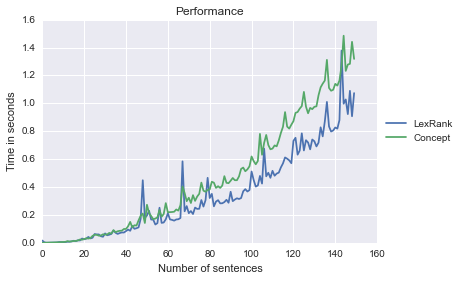

In [319]:
fig, ax = plt.subplots()
ax.plot(time_lex)
ax.plot(time_apec)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylabel('Time in seconds')
ax.set_xlabel('Number of sentences')
ax.set_title('Performance')
ax.legend( ('LexRank', 'Concept'), loc='center left', bbox_to_anchor=(1, 0.5))